In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Simulate conversion data for youtube and tiktok
np.random.seed(42)
n_utube=10000
n_tiktok=10000

In [7]:
# Conversion rates: utube = 60/10000 tiktok= 45/10000
youtube_conversions = np.array([1]*60 + [0]*(n_utube - 60))
tiktok_conversions = np.array([1]*45 + [0]*(n_tiktok - 45))

In [13]:
data = np.concatenate([youtube_conversions, tiktok_conversions])
labels = np.array(['YouTube']*n_utube + ['TikTok']*n_tiktok)

In [17]:
# Observed difference in conversion rate
obs_diff = youtube_conversions.mean() - tiktok_conversions.mean()
obs_diff

0.0015000000000000005

In [19]:
# Perform permutation test
n_iterations = 10000
diffs = []

In [21]:
for i in range(n_iterations):
    shuffled_labels=np.random.permutation(labels)
    group1=data[shuffled_labels=='YouTube']
    group2=data[shuffled_labels=='TikTok']

    diff=group1.mean() - group2.mean()
    diffs.append(diff)

In [23]:
# Calculate p value  one sideed test u tube > tiktok
# p_value = np.mean(np.array(diffs) >= obs_diff)
p_value_two_sided = np.mean(np.abs(diffs) >= np.abs(obs_diff))

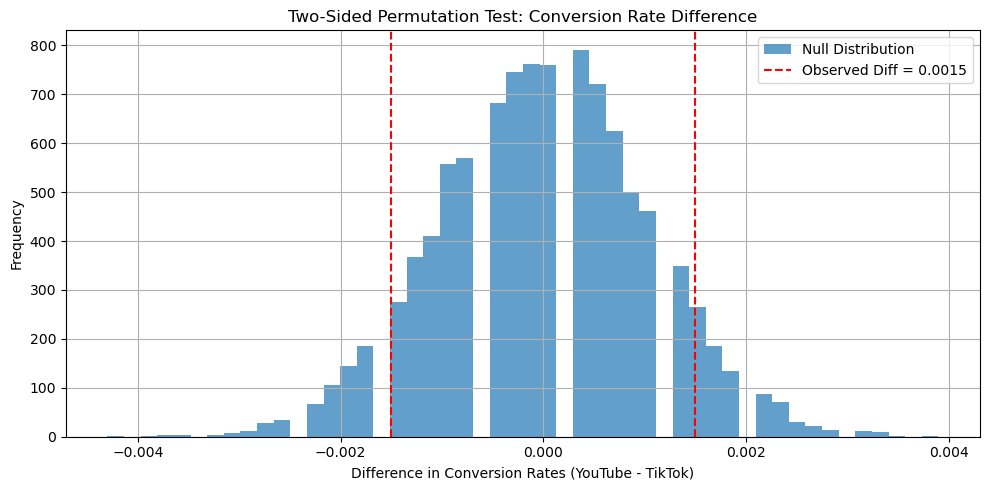

In [25]:
# Plot results
plt.figure(figsize=(10, 5))
plt.hist(diffs, bins=50, alpha=0.7, label='Null Distribution')
plt.axvline(obs_diff, color='red', linestyle='--', label=f'Observed Diff = {obs_diff:.4f}')
plt.axvline(-obs_diff, color='red', linestyle='--')
plt.title('Two-Sided Permutation Test: Conversion Rate Difference')
plt.xlabel('Difference in Conversion Rates (YouTube - TikTok)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Return two-sided p-value
p_value_two_sided

0.1703

In [29]:
# Fail to reject null since p-value is greater than stipulated 0.05